In [1]:
using LinearAlgebra, Random, Statistics, Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
# the following code requires the LowRankModels package, which you can add like this:
# using Pkg; Pkg.add("https://github.com/madeleineudell/LowRankModels.jl")

# code for the proximal gradient method (solves opt problems below)
include("proxgrad.jl")

proxgrad_const

In [3]:
"""plot line y = w*x+b"""
function plotline(w,b;
                  xmin=0,xmax=10,label="")
    xsamples = [xmin, xmax]
    plot!(xsamples, [w*x+b for x in xsamples], color=:black, label=label)
end
plotline(w::Array{Float64,1}; kwargs...) = 
    plotline(w[1], w[2], kwargs...)

plotline (generic function with 2 methods)

In [4]:
"""plot function y=f(x)"""
function plotfunc(f;
                  xmin=-100,xmax=100,nsamples=100,label="")
    xsamples = LinRange(xmin,xmax,nsamples)
    plot!(xsamples, [f(x) for x in xsamples], color=:black, label=label)
end

plotfunc

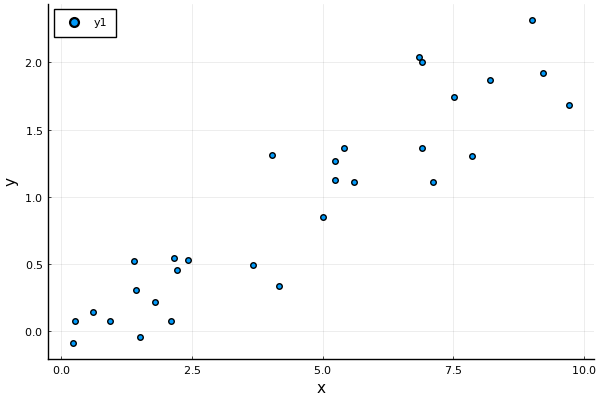

In [5]:
# Generate and plot data
Random.seed!(2)
n = 30
function sample_data(num_points)
    x = rand(num_points)*10
    y = .2*x + .3*randn(num_points)
    return x,y
end
x,y = sample_data(n)

"""function to plot the above data"""
function plotdata(x=x,y=y; margin=.05)
    scatter(x,y,markershape=:circle,legend=:topleft)
    xlabel!("x")
    ylabel!("y")
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
    xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
end
plotdata()

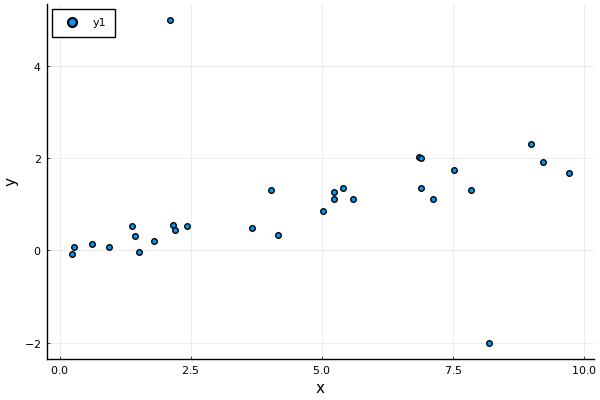

In [6]:
# mess up the data
outliers=true
if outliers
    y[3] = 5
    y[4] = -2
end
plotdata()

Least squares will fit inliers _______ than Huber regression 
* A) better 
* B) worse

Least squares will fit outliers _______ than Huber regression 
* A) better 
* B) worse

# Least squares

In [7]:
n = length(y)
X = [x ones(length(x))]
w_quad = X\y
w_quad = proxgrad(1/n*QuadLoss(), ZeroReg(), X, y, maxiters=200)

2-element Array{Float64,1}:
 0.12416816940212905
 0.4081630172934291

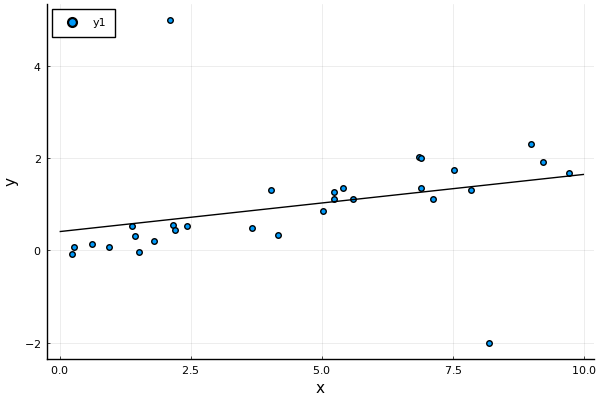

In [8]:
# plot the fit
plotdata()
plotline(w_quad)

In [9]:
mean(y - X*w_quad)

0.0029958214131285245

In [10]:
median(y - X*w_quad)

-0.1068528916065602

# ℓ_1 regression

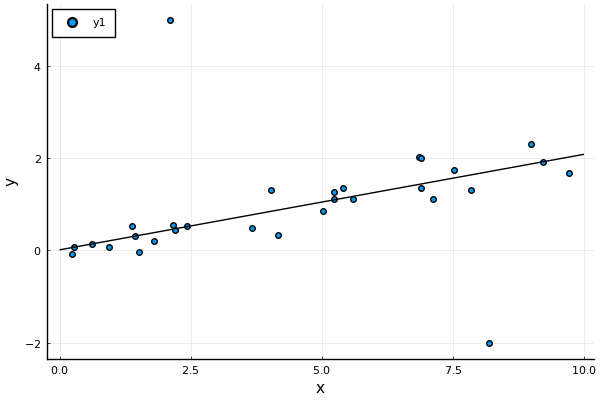

In [11]:
w_l1 = proxgrad(1/n*L1Loss(), ZeroReg(), X, y, 
                maxiters=200)

# plot the fit
plotdata()
plotline(w_l1)

In [12]:
mean(y - X*w_l1)

0.025594139717015702

In [13]:
median(y - X*w_l1)

-0.0006832560429982787

# Huber regression

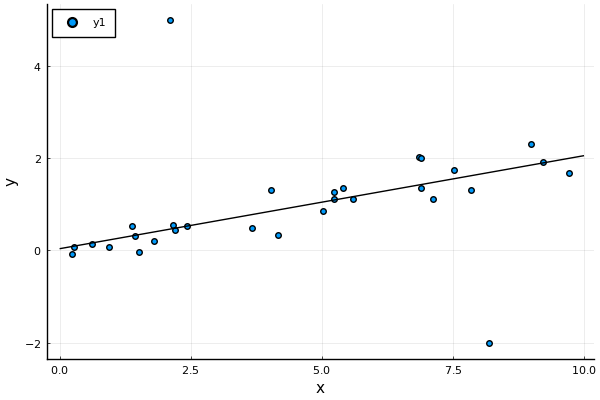

In [14]:
w_huber = proxgrad(1/n*HuberLoss(), ZeroReg(), X, y, maxiters=200)

# plot the fit
plotdata()
plotline(w_huber)

In [15]:
mean(y - X*w_huber)

0.02528104702111271

In [16]:
median(y - X*w_huber)

-0.01973449189628694

In [17]:
# Quantile regression

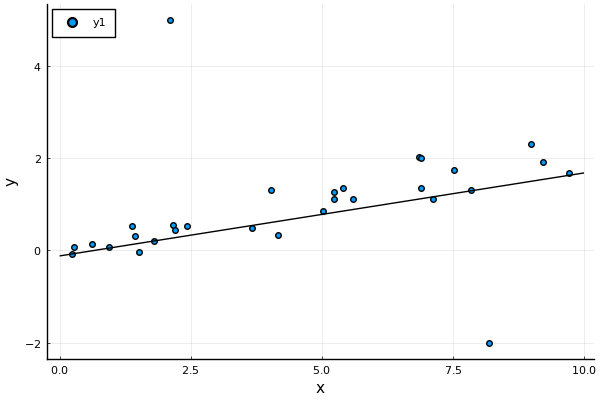

In [39]:
α = .2
w_quant = proxgrad(1/n*QuantileLoss(quantile=α), ZeroReg(), X, y, maxiters=1000)

# plot the fit
plotdata()
plotline(w_quant)

In [34]:
mean(y - X*w_quant)

0.5979176021526289

In [35]:
median(y - X*w_quant)

0.4711759764693378

In [36]:
quantile(y - X*w_quant,α)

0.004334709437544921

In [22]:
@show w_quad
@show w_l1
@show w_huber
@show w_quant;

w_quad = [0.12416816940212905, 0.4081630172934291]
w_l1 = [0.20739258178832115, 0.011970093660056632]
w_huber = [0.20198183764752797, 0.03657203098532493]
w_quant = [0.10812603046027888, -0.11474555969029893]


# Plot quantiles of distribution

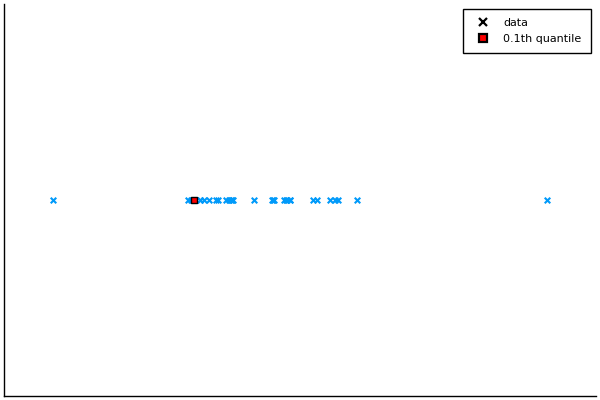

In [32]:
q = .1
l = QuantileLoss(quantile=q)
w_nocov = proxgrad(1/n*l, ZeroReg(), ones(n,1), y, stepsize=.9, maxiters=50)

scatter(y, zeros(n), axis = nothing, shape=:x, label="data")
scatter!([w_nocov], [0], color = :red, shape=:square, label="$(q)th quantile") 
ylims!((-1,1))
m,M = minimum(y), maximum(y)
xlims!((minimum(y)-(M-m)/10, maximum(y)+(M-m)/10))
# arrow(0, 0, maximum(y)+(M-m)/20, 0, head_width=0.05, head_length=0.1, fc="k", ec="k")
# arrow(0, 0, minimum(y)-(M-m)/20, 0, head_width=0.05, head_length=0.1, fc="k", ec="k")
# savefig("quantile_$(q).pdf")